In [68]:
from bs4 import BeautifulSoup
import requests,lxml
import pandas as pd

In [69]:
url = 'https://www.walmart.com/reviews/product/15056179?page=1'

In [70]:
result = requests.get(url)
c = result.content
soup = BeautifulSoup(c, 'html')

In [71]:
name = soup.find('div', {'class':'LinesEllipsis'}).text

In [ ]:
#Name of the Product

In [72]:
name

'Marketside Organic Half & Half Mix Salad, 5.5 oz'

In [ ]:
#getting a single review using the class

In [73]:
reviews = soup.find('div', {'class':'review-text'})

In [ ]:
#getting the average rating

In [75]:
stars = soup.find('span', {'class':'visuallyhidden seo-avg-rating'})

In [76]:
stars

<span class="visuallyhidden seo-avg-rating">3.2</span>

In [ ]:
#getting the date the review was posted

In [77]:
date = soup.find('div',{'class':'review-date'})

In [78]:
print(date.text)

November 4, 2015


In [79]:
soup

<!DOCTYPE html>
<html lang="en"><head>
<meta charset="utf-8"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><link href="//i5.wal.co" rel="dns-prefetch"/><link href="//i5.walmartimages.com" rel="dns-prefetch"/><link href="//b.wal.co" rel="dns-prefetch"/><link href="//beacon.walmart.com" rel="dns-prefetch"/><link href="//tpc.googlesyndication.com" rel="dns-prefetch"/><link href="//partner.googleadservices.com" rel="dns-prefetch"/><link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/><link href="//p.typekit.net" rel="dns-prefetch"/><link href="//omniture.walmart.com" rel="dns-prefetch"/><link href="//omniture-ssl.walmart.com" rel="dns-prefetch"/><link href="//pubads.g.doubleclick.net" rel="dns-prefetch"/><link href="//beam.hlserve.com" rel="dns-prefetch"/><link href="//secure-assets.rubiconproject.com" rel="dns-prefetch"/><link href="//ib.adnxs.com" rel="dns-prefetch"/><link href="//dis.criteo.com" rel="dns-prefetch"/><meta content="width=device-width, initial-

In [80]:
reviews

<div class="review-text"><p>Pleasantly surprised with this mix. All organic mix of Organic Baby Spinach, Organic Baby Spinach, Red And Green Romaine, Organic Baby Greens, Red And Green Chard, Red And Green Mustard, Frisee, Arugula, Organic Radicchio, Organic Red Kale. Fresh and delicious. Lasted days longer than the recommended 3 days.</p></div>

In [ ]:
#to get all the reviews we get the grid and loop in it.

In [14]:
rows = soup.findAll('div',{"class":"Grid ReviewList-content"})

In [81]:
names = []
ratings = []
review = []
date = []
helpful = []

In [82]:
for row in rows:
    names.append(row.find('span',{'class':'review-footer-userNickname'}).text)
    date.append(row.find('div',{'class':'review-date'}).text)
    ratings.append(row.find('span',{'class':'visuallyhidden seo-avg-rating'}).text)
    review.append(row.find('div',{'class':'review-text'}).text)
    helpful.append(row.find('span',{'class':'yes-no-count underline'}).text)

In [83]:
len(names)

20

In [ ]:
#getting the same from the second page

In [84]:
url1 = 'https://www.walmart.com/reviews/product/15056179?page=2'
result1 = requests.get(url1)
c1 = result1.content
soup1 = BeautifulSoup(c1, 'html')

In [85]:
rows1 = soup1.findAll('div',{"class":"Grid ReviewList-content"})

In [164]:
#Since some customers didn't give a review and only gave a rating we replace '' with 'No Review Given' as otherwise
#the data is lost

In [86]:
for row in rows1:
    names.append(row.find('span',{'class':'review-footer-userNickname'}).text)
    date.append(row.find('span',{'class':'review-date-submissionTime'}).text)
    ratings.append(row.find('span',{'class':'visuallyhidden seo-avg-rating'}).text)
    if(row.find('div',{'class':'review-text'}) == None):
        review.append('No Review Given')
    else:
        review.append(row.find('div',{'class':'review-text'}).text)
    helpful.append(row.find('span',{'class':'yes-no-count underline'}).text)

In [ ]:
#creating a dataframe out of the arrays

In [87]:
df = pd.DataFrame({'Name':names, 'Rating':ratings,'Review':review, 'Date':date, 'Helpful':helpful}, columns=['Name', 'Rating', 'Review','Date','Helpful'])

In [88]:
df

,Name,Rating,Review,Date,Helpful
0,Bigdeohgee,5.0,Pleasantly surprised with this mix. All organi...,"November 4, 2015",2
1,DannielleY,4.0,We usually buy the organic spring mix made by ...,"March 31, 2016",1
2,Anamah,3.0,I think you may solve the problem all these sa...,"January 2, 2015",9
3,DebC,3.0,"My issue is not only with Marketside salads, b...","November 11, 2015",7
4,ColJ,3.0,I check the date on the container but several ...,"March 7, 2016",2
5,Cody,2.0,Good quality lettuce but found a dead grasshop...,"May 1, 2019",0
6,MommaGail,2.0,I love the idea of organic salad mix but I am ...,"March 11, 2015",0
7,Robert,1.0,I am going to quit buying this item and all th...,"September 23, 2015",3
8,Reviewer,1.0,"Lately ever time I have bought this salad,upon...","November 16, 2015",1
9,Looneybin,1.0,This purchase was not a good one. I usually bu...,"December 9, 2015",1


In [ ]:
#exact overall rating

In [89]:
overall_rating = soup.find('div',{'class':'wyr-product-review-rounded-overall'}).text

In [90]:
overall_rating

'3.2'

In [ ]:
#total rating count

In [93]:
rating_count = soup.find('div',{'class':'wyr-total-review-count'}).text

In [94]:
rating_count

'36 ratings'

In [95]:
#Number of recommenders of the Product

In [96]:
rec_num = soup.find('span',{'class':'would-you-recommend-total-recommended'}).text

In [97]:
rec_num

'(20 of 36)'

In [98]:
#getting information about how ratings are distributed

In [99]:
stars = soup.find('div',{'class':'product-review-wyr-histogram'})

In [100]:
stars

<div class="ReviewHistogram product-review-wyr-histogram"><div aria-label="13 5-star reviews,         select to filter by 5 star reviews" class="RatingFilter" role="button" tabindex="0"><div class="MeterInline">5 stars</div><div class="Meter Histogram"><span class="MeterBar" style="width:36.11111111111111%"></span></div><span class="font-normal">13</span></div><div aria-label="5 4-star reviews,         select to filter by 4 star reviews" class="RatingFilter" role="button" tabindex="0"><div class="MeterInline">4 stars</div><div class="Meter Histogram"><span class="MeterBar" style="width:13.88888888888889%"></span></div><span class="font-normal">5</span></div><div aria-label="4 3-star reviews,         select to filter by 3 star reviews" class="RatingFilter" role="button" tabindex="0"><div class="MeterInline">3 stars</div><div class="Meter Histogram"><span class="MeterBar" style="width:11.11111111111111%"></span></div><span class="font-normal">4</span></div><div aria-label="5 2-star revie

In [101]:
a = stars.find_all('span',{'class':'font-normal'})

In [102]:
#storing the results in variables

In [103]:
FiveStar = a[0].text
FourStar = a[1].text
ThreeStar = a[2].text
TwoStar = a[3].text
OneStar = a[4].text

In [104]:
#####################SENTIMENT ANALYSIS ON WALMART DATA############################

In [124]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

In [125]:
for line in df['Review']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [126]:
results

[{'neg': 0.0,
  'neu': 0.766,
  'pos': 0.234,
  'compound': 0.8957,
  'headline': 'Pleasantly surprised with this mix. All organic mix of Organic Baby Spinach, Organic Baby Spinach, Red And Green Romaine, Organic Baby Greens, Red And Green Chard, Red And Green Mustard, Frisee, Arugula, Organic Radicchio, Organic Red Kale. Fresh and delicious. Lasted days longer than the recommended 3 days.'},
 {'neg': 0.0,
  'neu': 0.911,
  'pos': 0.089,
  'compound': 0.5106,
  'headline': 'We usually buy the organic spring mix made by Fresh Express from Food Lion, but we were at Wal-Mart and needed some leafy greens for the week. This served us well, taste was comparable, lasted our family of 3 almost the entire week. I would probably buy again.'},
 {'neg': 0.11,
  'neu': 0.718,
  'pos': 0.172,
  'compound': 0.8012,
  'headline': "I think you may solve the problem all these salads present.\nMany days before the date, there are leaves mush, decomposed and even rotten.\nAnd that is unacceptable on this 

In [127]:
df_res = pd.DataFrame.from_records(results)
df_res.head()

,neg,neu,pos,compound,headline
0,0.000,0.766,0.234,0.8957,Pleasantly surprised with this mix. All organi...
1,0.000,0.911,0.089,0.5106,We usually buy the organic spring mix made by ...
2,0.110,0.718,0.172,0.8012,I think you may solve the problem all these sa...
3,0.085,0.817,0.098,0.1901,"My issue is not only with Marketside salads, b..."
4,0.109,0.891,0.000,-0.3491,I check the date on the container but several ...


In [128]:
#Giving lables as based on compound VADER score

In [129]:
df_res['label'] = 0
df_res.loc[df_res['compound'] > 0.2, 'label'] = 1
df_res.loc[df_res['compound'] < -0.2, 'label'] = -1
df_res.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.766,0.234,0.8957,Pleasantly surprised with this mix. All organi...,1
1,0.000,0.911,0.089,0.5106,We usually buy the organic spring mix made by ...,1
2,0.110,0.718,0.172,0.8012,I think you may solve the problem all these sa...,1
3,0.085,0.817,0.098,0.1901,"My issue is not only with Marketside salads, b...",0
4,0.109,0.891,0.000,-0.3491,I check the date on the container but several ...,-1


In [130]:
df_res.tail()

,neg,neu,pos,compound,headline,label
31,0.000,0.164,0.836,0.6249,Nice and fresh,1
32,0.000,1.000,0.000,0.0000,Grate,0
33,0.524,0.476,0.000,-0.2960,No Review Given,-1
34,0.524,0.476,0.000,-0.2960,No Review Given,-1
35,0.524,0.476,0.000,-0.2960,No Review Given,-1


In [131]:
df.tail()

,Name,Rating,Review,Date,Helpful
31,Tweezers,5.0,Nice and fresh,"April 16, 2016",0
32,Alexuk61,5.0,Grate,"April 24, 2016",0
33,turquoisesweetie,5.0,No Review Given,"May 13, 2020",0
34,JEFFREY,5.0,No Review Given,"April 5, 2020",0
35,Blaze13,1.0,No Review Given,"November 22, 2018",0


In [132]:
### NLP for getting frequent words ###

In [133]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [134]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [135]:
def process_text(lines):
    tokens = []
    for line in lines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [136]:
pos_lines = list(df_res[df_res.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('mix', 14),
 ('organic', 11),
 ('salad', 9),
 ('fresh', 8),
 ('3', 7),
 ('baby', 6),
 ('date', 6),
 ('days', 5),
 ('spring', 5),
 ('great', 5),
 ('spinach', 4),
 ('red', 4),
 ('green', 4),
 ('greens', 4),
 ('leaves', 4),
 ('good', 4),
 ('eat', 4),
 ('buy', 3),
 ('box', 3),
 ('wilted', 3)]

In [137]:
neg_lines = list(df_res[df_res.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('bad', 7),
 ('date', 5),
 ('salad', 4),
 ('mix', 4),
 ('long', 4),
 ('good', 4),
 ('rotten', 4),
 ('slimy', 4),
 ('review', 4),
 ('container', 3),
 ('days', 3),
 ('lettuce', 3),
 ('organic', 3),
 ('leaves', 3),
 ('going', 3),
 ('buy', 3),
 ('anything', 3),
 ('given', 3),
 ('last', 2),
 ('home', 2)]

In [138]:
#plotting word frequency in postive words

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

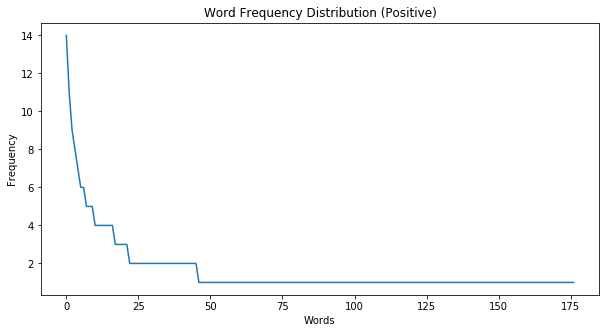

In [140]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [141]:
#plotting the negative word frequency distribution

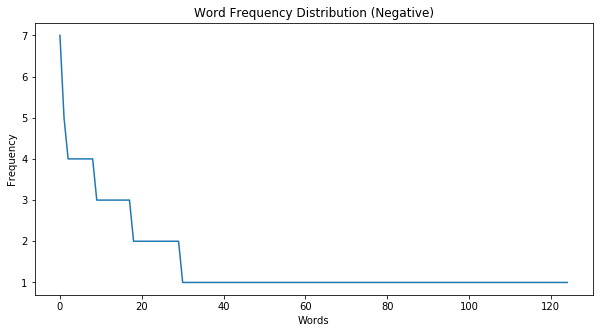

In [142]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

In [143]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [144]:
# word cloud for postive labels

In [147]:
text1 = "".join(review for review in df_res[df_res.label == 1].headline)

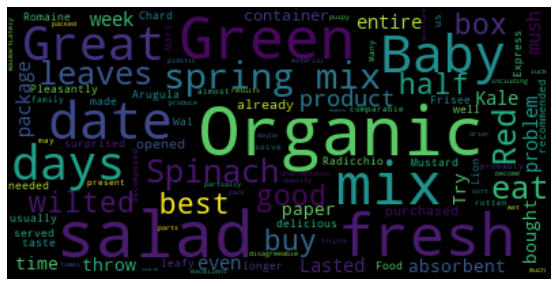

In [148]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text1)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [149]:
# Word cloud for negative labels

In [150]:
text2 = "".join(review for review in df_res[df_res.label == -1].headline)

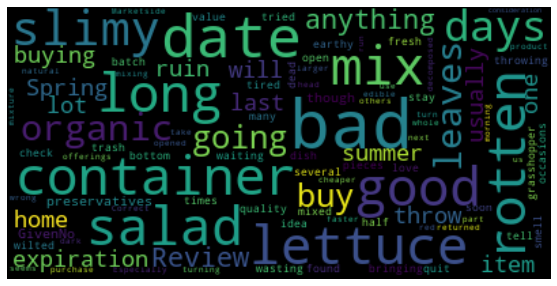

In [151]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text2)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [156]:
#for getting individual star ratings

In [152]:
s = [int(FiveStar),int(FourStar),int(ThreeStar),int(TwoStar),int(OneStar)]

In [153]:
labels = ['5-star','4-star','3-star','2-star','1-star']

In [154]:
dff = pd.DataFrame({
    'columns':labels,
    'Number of Stars': s})

In [155]:
dff

,columns,Number of Stars
0,5-star,13
1,4-star,5
2,3-star,4
3,2-star,5
4,1-star,9


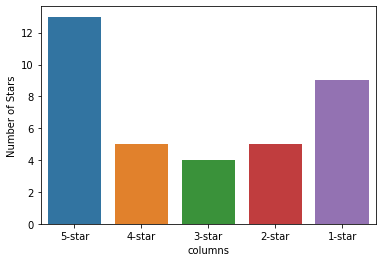

In [157]:
sns.barplot(y=dff['Number of Stars'],x=dff['columns'])

In [159]:
#user given ratings on a kde plot

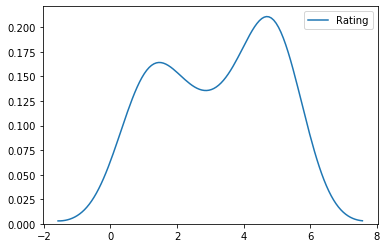

In [158]:
import seaborn as sns
sns.kdeplot(data = df['Rating'])

In [160]:
#convering date from August xx,xxxx format to YYYY-DD-MM

In [161]:
from datetime import datetime
def date_make(a):
    a = datetime.strptime(a, "%B %d, %Y")
    return a

In [162]:
df['Date'] = df['Date'].apply(date_make)